In [102]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score   

In [103]:
import nltk
from nltk.corpus import stopwords

In [104]:
data = pd.read_csv('flipkart_data.csv')

In [105]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [106]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

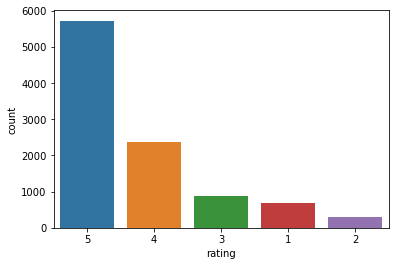

In [107]:
sns.countplot(data=data, x='rating',order=data.rating.value_counts().index)


In [108]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [109]:
data.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [110]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

In [111]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [112]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],test_size=0.33, stratify=data['label'], random_state =42)

In [118]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [119]:
#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9362561723776747


In [120]:
from sklearn import metrics
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


NameError: name 'confusion_matrix' is not defined